In [94]:
# Logistic Regression

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('bank.csv')
df = df.drop(['id'], axis=1)

In [7]:
df

,age,sex,region,income,married,children,car,mortgage,delays
0,48,0,0,17546.00,0,1,0,0,0
1,40,1,1,30085.10,1,3,1,1,1
2,51,0,0,16575.40,1,0,1,0,0
3,23,0,1,20375.40,1,3,0,0,0
4,57,0,2,50576.30,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
595,61,0,0,47025.00,0,2,1,1,1
596,30,0,0,9672.25,1,0,1,0,0
597,31,0,1,15976.30,1,0,1,0,0
598,29,1,0,14711.80,1,0,0,1,0


In [3]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [8]:
# Encoding categorical data
df = encoding_char(df)

In [9]:
df

,age,sex,region,income,married,children,car,mortgage,delays
0,48,0,0,17546.00,0,1,0,0,0
1,40,1,1,30085.10,1,3,1,1,1
2,51,0,0,16575.40,1,0,1,0,0
3,23,0,1,20375.40,1,3,0,0,0
4,57,0,2,50576.30,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
595,61,0,0,47025.00,0,2,1,1,1
596,30,0,0,9672.25,1,0,1,0,0
597,31,0,1,15976.30,1,0,1,0,0
598,29,1,0,14711.80,1,0,0,1,0


In [34]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [35]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [50]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.287702
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.585     
Dependent Variable: y                AIC:              292.1943  
Date:               2020-10-14 00:03 BIC:              325.5846  
No. Observations:   480              Log-Likelihood:   -138.10   
Df Model:           7                LL-Null:          -332.71   
Df Residuals:       472              LLR p-value:      4.8884e-80
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
--------------------------------------------------------------------
         Coef.     Std.Err.      z       P>|z|      [0.025    0.975]
--------------------------------------------------------------------
x1       0.6488      0.2106    3.0815    0.0021     0.2362    1.0615
x2       0.0513      0.1551    0.3307    0.7409    -0.

In [63]:
# Features selection
X_train = X_train[:,[0,3]]
X_test = X_test[:,[0,3]]

In [64]:
# Fitting Logistic Regression to the Training set (2 variables)
from sklearn.linear_model import LogisticRegression
slr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [66]:
# Predicting the Test set results
y_pred = slr.predict(X_test)
slr.score(X_test,y_test)

0.8833333333333333

In [61]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56 10]
 [ 4 50]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


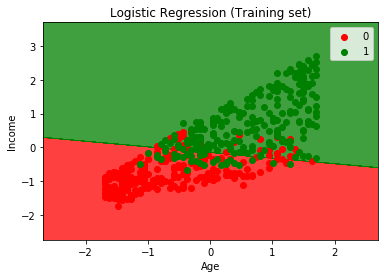

In [67]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, slr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


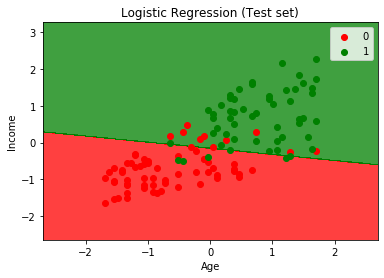

In [68]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, slr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

In [77]:
df[['age','income','delays']].to_csv('bank_prep.csv', sep=',', index=False)